In [30]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

In [31]:
file_path = r"C:\Users\karth\Desktop\solarproject\SolarPrediction1.csv"

# Load and preprocess the data
data = pd.read_csv(file_path)
print(data.info())
display(data)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   UNIXTime       32686 non-null  int64  
 1   Date           32686 non-null  object 
 2   Time           32686 non-null  object 
 3   Radiation      32686 non-null  float64
 4   Temperature    32686 non-null  int64  
 5   Pressure       32686 non-null  float64
 6   Humidity       32686 non-null  int64  
 7   WindDirection  32686 non-null  float64
 8   Speed          32686 non-null  float64
 9   TimeSunRise    32686 non-null  object 
 10  TimeSunSet     32686 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 2.7+ MB
None


UNIXTime                   Date      Time  Radiation  Temperature  \
0      1475229326  9/29/2016 12:00:00 AM  23:55:26       1.21           48   
1      1475229023  9/29/2016 12:00:00 AM  23:50:23       1.21           48   
2      1475228726  9/29/2016 12:00:00 AM  23:45:26       1.23           48   
3      1475228421  9/29/2016 12:00:00 AM  23:40:21       1.21           48   
4      1475228124  9/29/2016 12:00:00 AM  23:35:24       1.17           48   
...           ...                    ...       ...        ...          ...   
32681  1480587604       12-01-2016 00:00  00:20:04       1.22           44   
32682  1480587301       12-01-2016 00:00  00:15:01       1.17           44   
32683  1480587001       12-01-2016 00:00  00:10:01       1.20           44   
32684  1480586702       12-01-2016 00:00  00:05:02       1.23           44   
32685  1480586402       12-01-2016 00:00  00:00:02       1.20           44   

       Pressure  Humidity  WindDirection  Speed TimeSunRise TimeSunSet  
0         30.46        59         177.39   5.62    06:13:00   18:13:00  
1         30.46        58         176.78   3.37    06:13:00   18:13:00  
2         30.46        57         158.75   3.37    06:13:00   18:13:00  
3         30.46        60         137.71   3.37    06:13:00   18:13:00  
4         30.46        62         104.95   5.62    06:13:00   18:13:00  
...         ...       ...            ...    ...         ...        ...  
32681     30.43       102         145.42   6.75    06:41:00   17:42:00  
32682     30.42       102         117.78   6.75    06:41:00   17:42:00  
32683     30.42       102         145.19   9.00    06:41:00   17:42:00  
32684     30.42       101         164.19   7.87    06:41:00   17:42:00  
32685     30.43       101          83.59   3.37    06:41:00   17:42:00  

[32686 rows x 11 columns]

In [32]:
print("\nMissing Values in Each Column:")
print(data.isnull().sum())


Missing Values in Each Column:
UNIXTime         0
Date             0
Time             0
Radiation        0
Temperature      0
Pressure         0
Humidity         0
WindDirection    0
Speed            0
TimeSunRise      0
TimeSunSet       0
dtype: int64


In [33]:
data['Time'] = pd.to_timedelta(data['Time']).dt.total_seconds()
data['TimeSunSet'] = pd.to_timedelta(data['TimeSunSet']).dt.total_seconds()
data['TimeSunRise'] = pd.to_timedelta(data['TimeSunRise']).dt.total_seconds()


In [34]:
import pandas as pd

# Assuming df is your DataFrame and 'Date' is the column you want to convert
data['Date'] = (pd.to_datetime(data['Date']).astype('int64') // 10**9).astype('int32')

# Display the updated DataFrame
display(data)


C:\Users\karth\AppData\Local\Temp\ipykernel_10948\418346463.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = (pd.to_datetime(data['Date']).astype('int64') // 10**9).astype('int32')


UNIXTime        Date     Time  Radiation  Temperature  Pressure  \
0      1475229326  1475107200  86126.0       1.21           48     30.46   
1      1475229023  1475107200  85823.0       1.21           48     30.46   
2      1475228726  1475107200  85526.0       1.23           48     30.46   
3      1475228421  1475107200  85221.0       1.21           48     30.46   
4      1475228124  1475107200  84924.0       1.17           48     30.46   
...           ...         ...      ...        ...          ...       ...   
32681  1480587604  1480550400   1204.0       1.22           44     30.43   
32682  1480587301  1480550400    901.0       1.17           44     30.42   
32683  1480587001  1480550400    601.0       1.20           44     30.42   
32684  1480586702  1480550400    302.0       1.23           44     30.42   
32685  1480586402  1480550400      2.0       1.20           44     30.43   

       Humidity  WindDirection  Speed  TimeSunRise  TimeSunSet  
0            59         177.39   5.62      22380.0     65580.0  
1            58         176.78   3.37      22380.0     65580.0  
2            57         158.75   3.37      22380.0     65580.0  
3            60         137.71   3.37      22380.0     65580.0  
4            62         104.95   5.62      22380.0     65580.0  
...         ...            ...    ...          ...         ...  
32681       102         145.42   6.75      24060.0     63720.0  
32682       102         117.78   6.75      24060.0     63720.0  
32683       102         145.19   9.00      24060.0     63720.0  
32684       101         164.19   7.87      24060.0     63720.0  
32685       101          83.59   3.37      24060.0     63720.0  

[32686 rows x 11 columns]

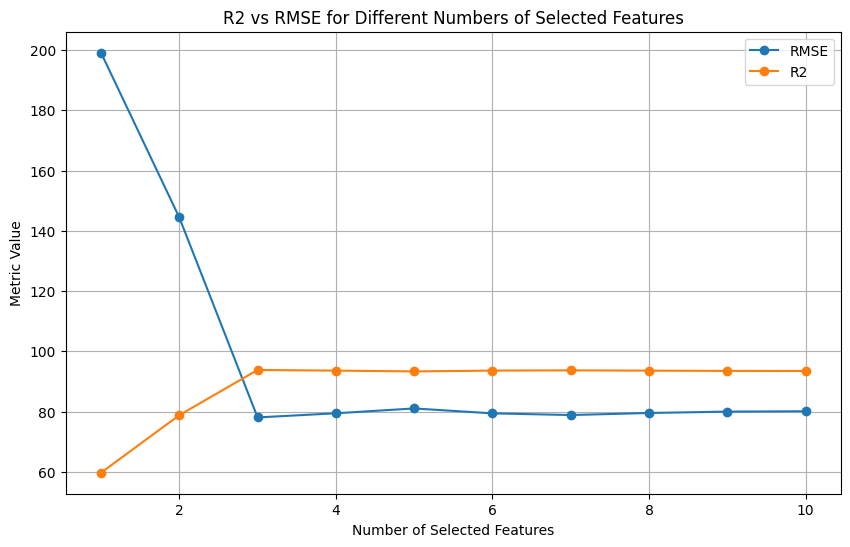

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assuming df is your DataFrame
X = data.drop(["Radiation"], axis=1)
y = data["Radiation"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Initialize lists to store results
r2_values = []
rmse_values = []
removed_variable_r2 = []
removed_variable_rmse = []

# Iterate over different numbers of selected features
for num_features in range(1, len(X.columns) + 1):
    # Use RandomForestRegressor as the estimator
    rf_model = RandomForestRegressor()
    rfe = RFE(estimator=rf_model, n_features_to_select=num_features)
    rfe.fit(X_train, y_train)

    selected_features = X_train.columns[rfe.support_]
    X_train_selected = rfe.transform(X_train)
    X_test_selected = rfe.transform(X_test)

    # Train the model using selected features
    rf_model.fit(X_train_selected, y_train)

    # Make predictions
    y_pred = rf_model.predict(X_test_selected)

    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_values.append(rmse)

    # Calculate R2
    r2 = r2_score(y_test, y_pred)
    r2_values.append(r2*100)

    # Record R2 and RMSE for every removed variable
    removed_variable_r2.append([X.columns[i] for i in range(len(X.columns)) if i not in rfe.get_support()])
    removed_variable_rmse.append([rmse] * len(removed_variable_r2[-1]))

# Plot R2 vs RMSE with both R2 and RMSE in two different lines
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(X.columns) + 1), rmse_values, label='RMSE', marker='o')
plt.plot(range(1, len(X.columns) + 1), r2_values, label='R2', marker='o')
plt.xlabel('Number of Selected Features')
plt.ylabel('Metric Value')
plt.title('R2 vs RMSE for Different Numbers of Selected Features')
plt.legend()
plt.grid(True)
plt.show()


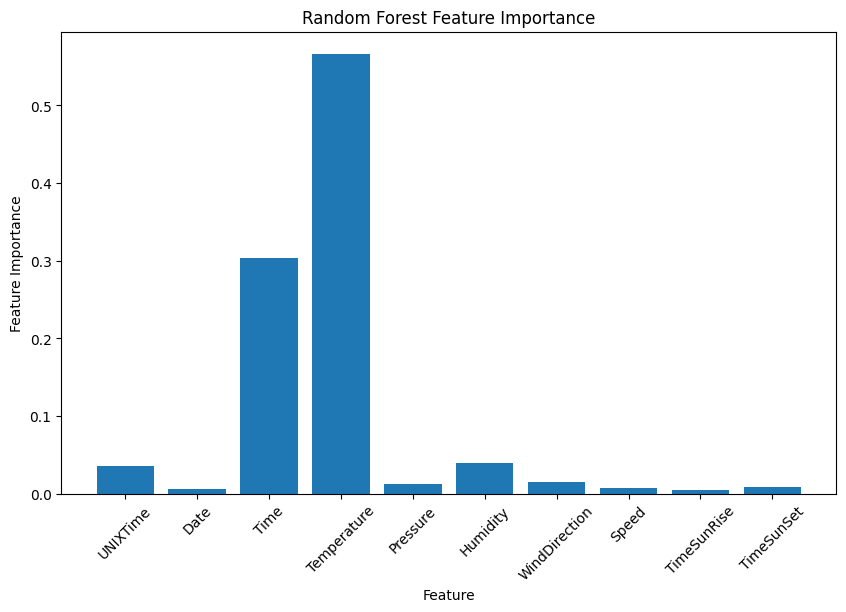

In [36]:
# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(X_train_selected.shape[1]), rf_model.feature_importances_, align="center")
plt.xticks(range(X_train_selected.shape[1]), selected_features, rotation=45)
plt.xlabel("Feature")
plt.ylabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()


In [37]:
data = data.drop([  'UNIXTime','Date','Speed'], axis=1)

[  1.22   1.21   1.2  ... 484.33 556.69 659.12]
RMSE: 81.83284453066419
R2 Value: 0.9319282690519203


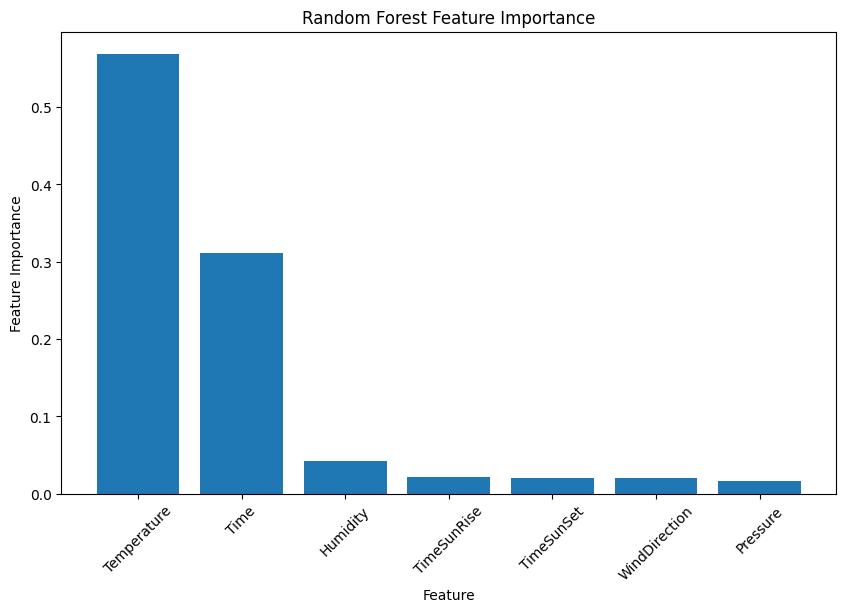

Number of Selected Variables: 7
Selected Variables: Index(['Time', 'Temperature', 'Pressure', 'Humidity', 'WindDirection',
       'TimeSunRise', 'TimeSunSet'],
      dtype='object')


In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assuming df is your DataFrame
X = data.drop(["Radiation"], axis=1)
y = data["Radiation"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

print(y_train.unique())


# Use RandomForestRegressor as the estimator
rf_model = RandomForestRegressor()
rfe = RFE(estimator=rf_model, n_features_to_select=7)
rfe.fit(X_train, y_train)

selected_features = X_train.columns[rfe.support_]
X_train_selected = rfe.transform(X_train)
X_test_selected = rfe.transform(X_test)

# Train the model using selected features
rf_model.fit(X_train_selected, y_train)

# Make predictions
y_pred = rf_model.predict(X_test_selected)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

# Calculate R2
r2 = r2_score(y_test, y_pred)
print("R2 Value:", r2)

# Plot feature importance
feature_importance = rf_model.feature_importances_
sorted_idx = np.argsort(feature_importance)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(X_train_selected.shape[1]), feature_importance[sorted_idx], align="center")
plt.xticks(range(X_train_selected.shape[1]), selected_features[sorted_idx], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()

# Display the number and names of selected variables
print("Number of Selected Variables:", len(selected_features))
print("Selected Variables:", selected_features)


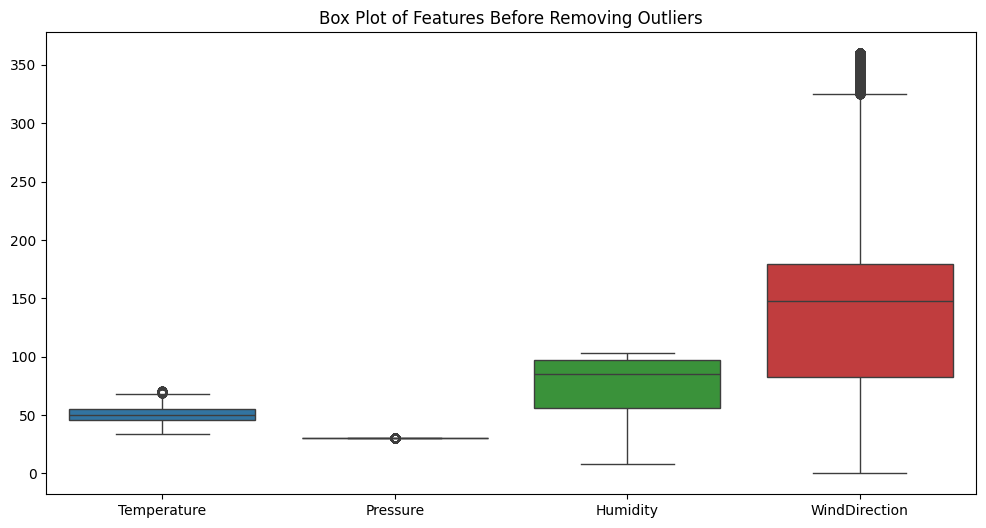

In [39]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[['Temperature', 'Pressure', 'Humidity', 'WindDirection', ]])
plt.title('Box Plot of Features Before Removing Outliers')
plt.show()

In [40]:
from scipy.stats import zscore
z_scores = zscore(data[['Temperature', 'Pressure', 'Humidity', 'WindDirection', ]])

data = data[(z_scores < 3).all(axis=1)]

In [41]:
Q1 = data[['Temperature', 'Pressure', 'Humidity', 'WindDirection',]].quantile(0.25)
Q3 = data[['Temperature', 'Pressure', 'Humidity', 'WindDirection', ]].quantile(0.75)
IQR = Q3 - Q1
data = data[~((data[['Temperature', 'Pressure', 'Humidity', 'WindDirection',]] < (Q1 - 1.5 * IQR)) | (data[['Temperature', 'Pressure', 'Humidity', 'WindDirection',]] > (Q3 + 1.5 * IQR))).any(axis=1)]

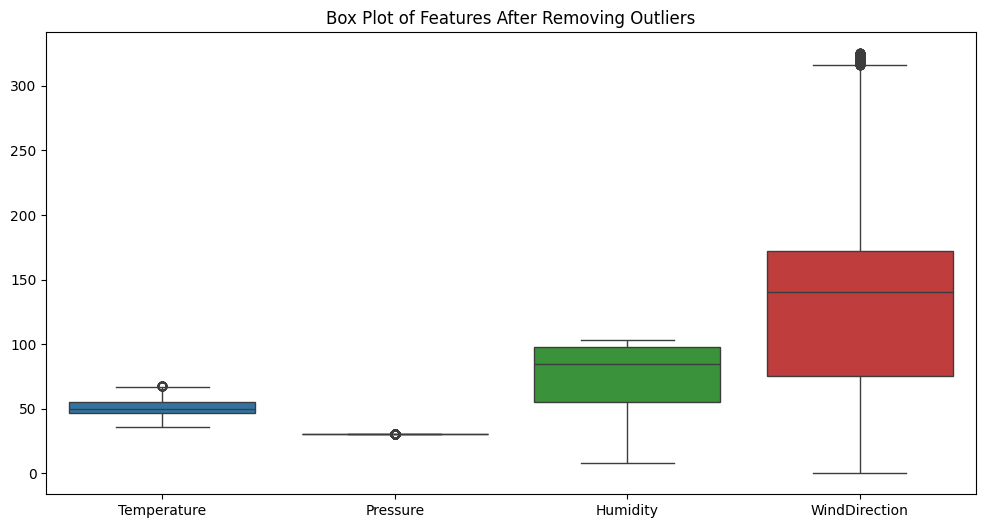

In [42]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[['Temperature', 'Pressure', 'Humidity', 'WindDirection', ]])
plt.title('Box Plot of Features After Removing Outliers')
plt.show()

In [43]:
data.describe()

Time     Radiation   Temperature      Pressure      Humidity  \
count  29461.000000  29461.000000  29461.000000  29461.000000  29461.000000   
mean   43138.936357    194.604744     51.036964     30.431261     74.916262   
std    25470.049923    308.030655      5.913649      0.041600     26.280387   
min        1.000000      1.110000     36.000000     30.310000      8.000000   
25%    20719.000000      1.230000     47.000000     30.410000     55.000000   
50%    42602.000000      2.170000     50.000000     30.430000     85.000000   
75%    66024.000000    322.540000     55.000000     30.460000     98.000000   
max    86185.000000   1601.260000     68.000000     30.550000    103.000000   

       WindDirection   TimeSunRise    TimeSunSet  
count   29461.000000  29461.000000  29461.000000  
mean      129.238544  23189.679237  64717.894844  
std        68.321990    895.846110   1004.948196  
min         0.090000  22020.000000  63720.000000  
25%        75.690000  22440.000000  63840.000000  
50%       140.330000  22980.000000  64320.000000  
75%       171.900000  23820.000000  65400.000000  
max       325.220000  25020.000000  67080.000000

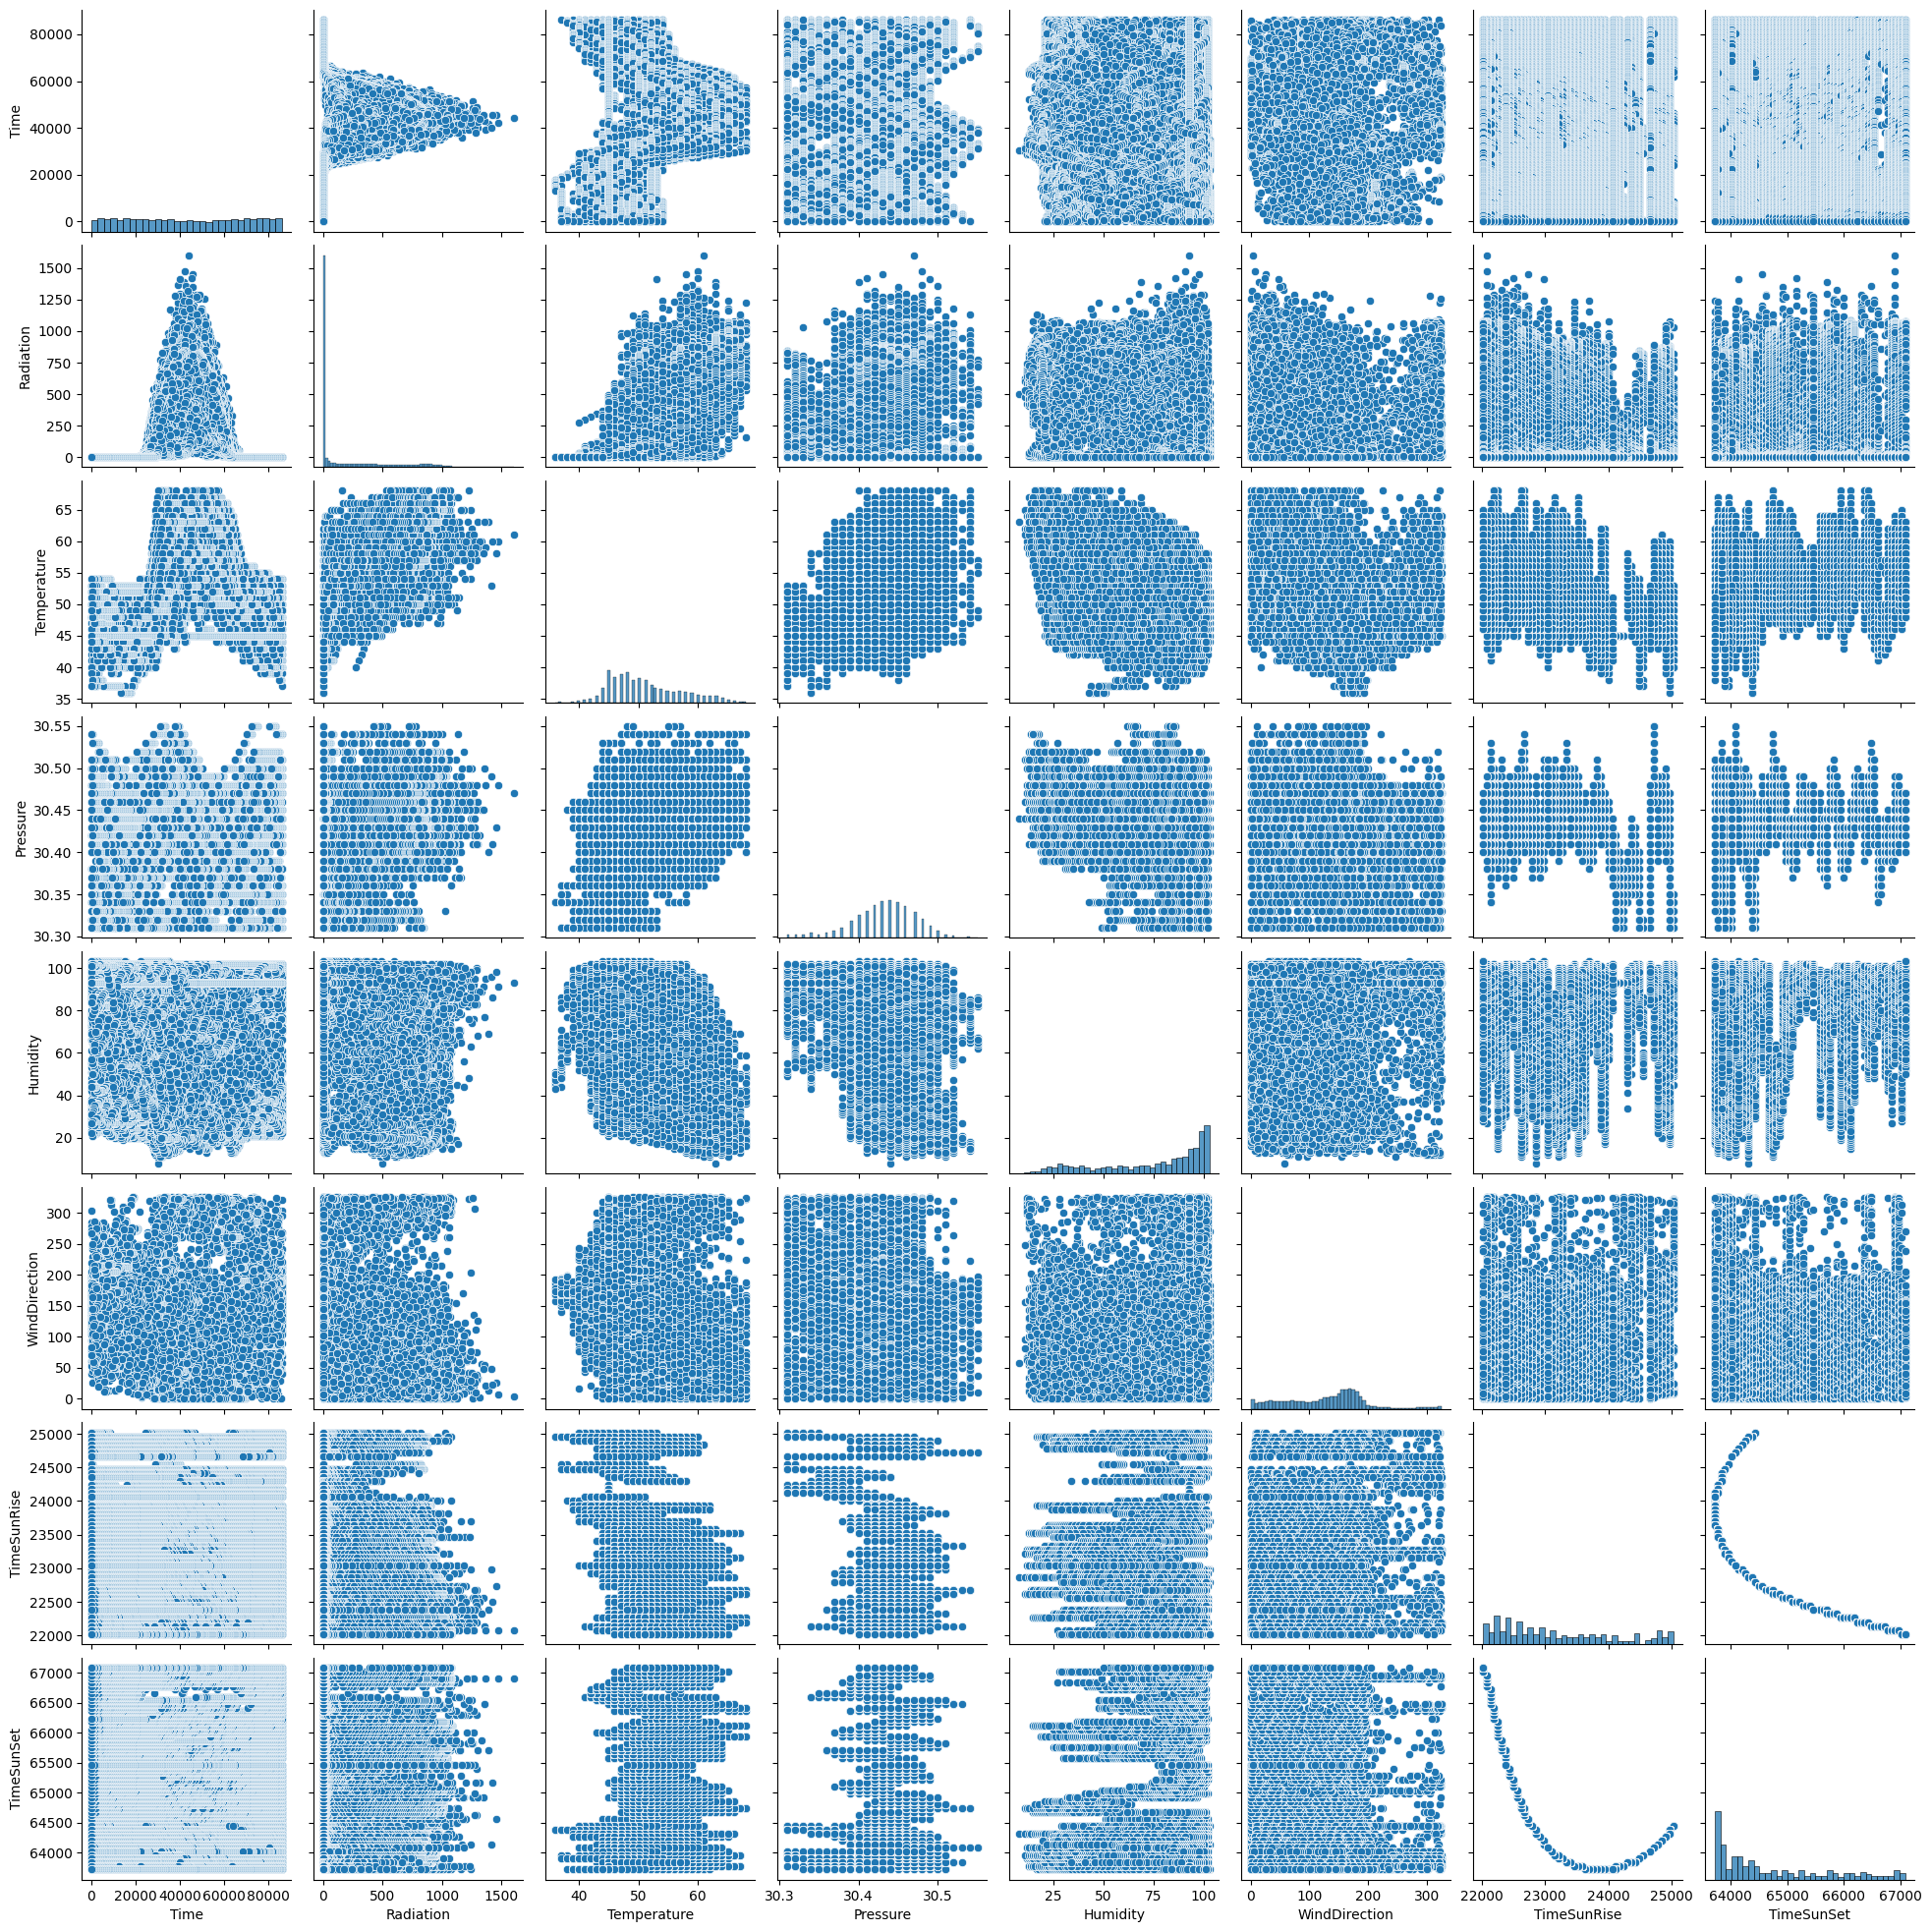

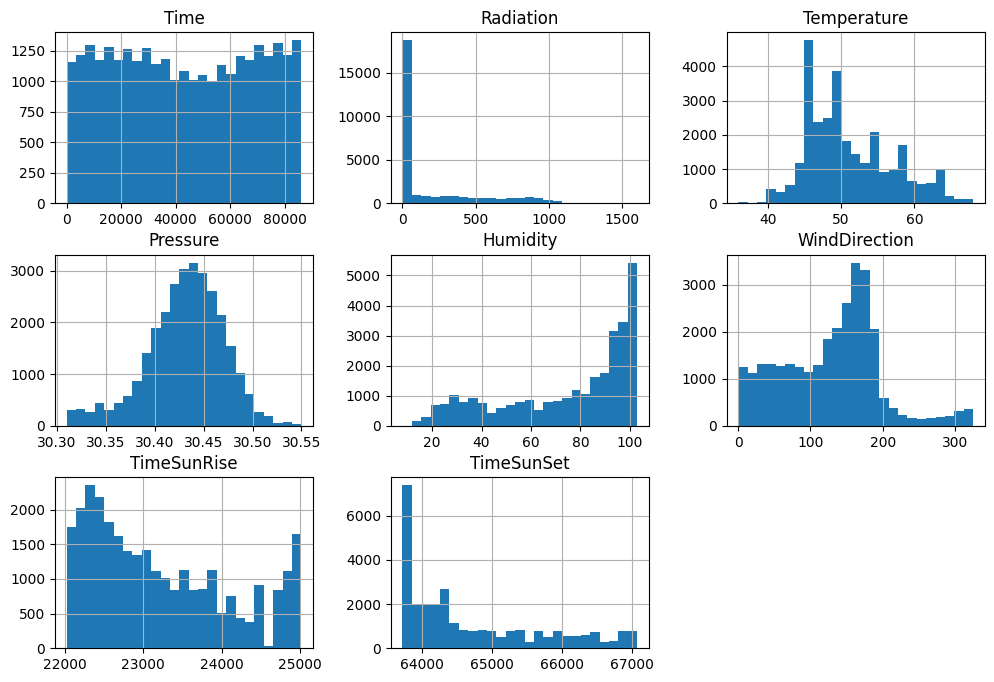

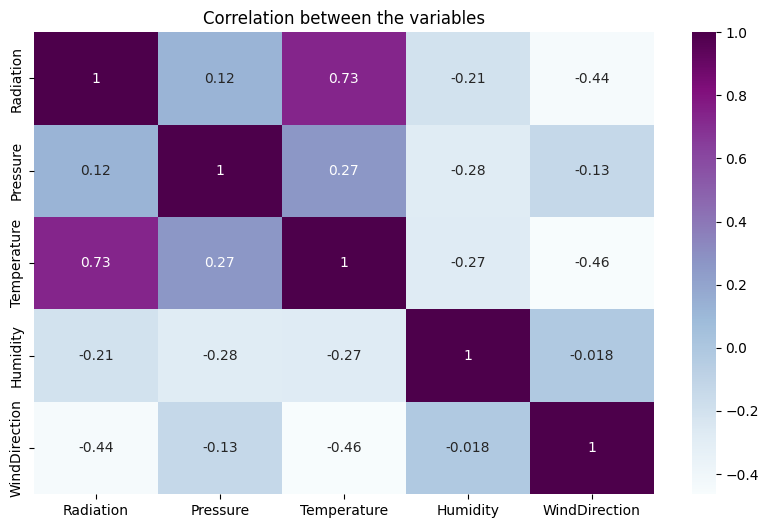

In [44]:
sns.pairplot(data)
plt.show()
data.hist(bins=25, figsize=(12,8))
plt.show()
plt.figure(figsize=(10,6))
sns.heatmap(data[["Radiation",  "Pressure", "Temperature", "Humidity", "WindDirection",]].corr(), 
            annot= True, cmap='BuPu', linecolor='black')
plt.title("Correlation between the variables")
plt.show()

In [45]:
scaler = StandardScaler()
X= pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
print(X)

           Time  Temperature  Pressure  Humidity  WindDirection  TimeSunRise  \
0      1.720795    -0.500439  0.678974 -0.616253       0.407620    -0.943425   
1      1.708626    -0.500439  0.678974 -0.654730       0.400285    -0.943425   
2      1.696699    -0.500439  0.678974 -0.693206       0.183490    -0.943425   
3      1.684450    -0.500439  0.678974 -0.577776      -0.069497    -0.943425   
4      1.672522    -0.500439  0.678974 -0.500823      -0.463407    -0.943425   
...         ...          ...       ...       ...            ...          ...   
32681 -1.689677    -1.145490  0.130250  1.038241       0.023209     0.860876   
32682 -1.701845    -1.145490 -0.052658  1.038241      -0.309138     0.860876   
32683 -1.713893    -1.145490 -0.052658  1.038241       0.020443     0.860876   
32684 -1.725901    -1.145490 -0.052658  0.999764       0.248901     0.860876   
32685 -1.737949    -1.145490  0.130250  0.999764      -0.720242     0.860876   

       TimeSunSet  
0        0.892967  

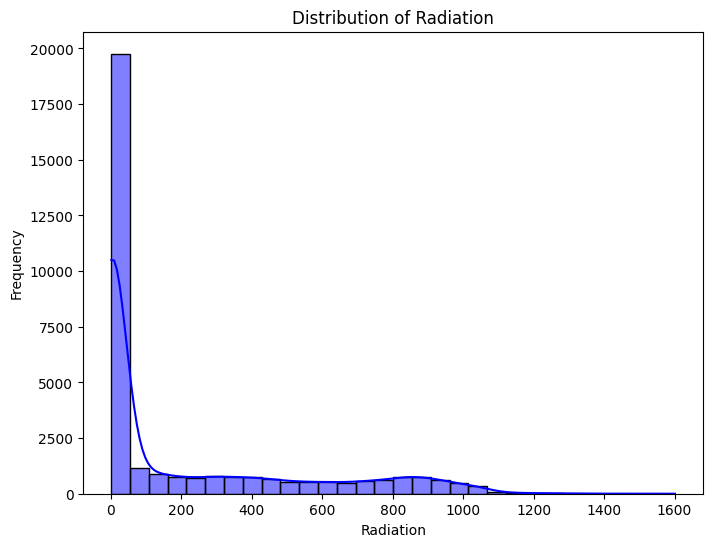

In [46]:
plt.figure(figsize=(8, 6))
sns.histplot(y, kde=True, color='blue', bins=30)
plt.title('Distribution of Radiation')
plt.xlabel('Radiation')
plt.ylabel('Frequency')
plt.show()

In [47]:
print("X_train:")
print(X_train.head(5))
print("\nX_test:")
print(X_test.head(5))
print("y_train:")
print(y_train.head(5))
print("\ny_test:")
print(y_test.head(5))

X_train:
          Time  Temperature  Pressure  Humidity  WindDirection  TimeSunRise  \
10556   5718.0           45     30.42        84         159.24      22740.0   
26469  19296.0           45     30.43        30         140.58      24900.0   
31811   3036.0           45     30.33        93         176.87      24180.0   
5346   69021.0           49     30.36       100         125.79      22140.0   
21735  59705.0           56     30.44        89          25.30      23280.0   

       TimeSunSet  
10556     64500.0  
26469     64260.0  
31811     63780.0  
5346      66660.0  
21735     63900.0  

X_test:
          Time  Temperature  Pressure  Humidity  WindDirection  TimeSunRise  \
22107  34507.0           59     30.47        44         312.67      23280.0   
3780   43503.0           59     30.48        83          38.01      22200.0   
13651  15621.0           47     30.39        78         213.62      22560.0   
30473  24656.0           45     30.40        98         176.63      244

In [48]:
def stacking_model(X_train, y_train, X_test, base_models):

    # Initialize arrays to store predictions
    base_model_predictions_train = np.zeros((len(X_train), len(base_models)))
    base_model_predictions_test = np.zeros((len(X_test), len(base_models)))
    
    # Implement K-fold cross-validation for each base model
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    
    for i, model in enumerate(base_models):
        for train_index, val_index in kf.split(X_train):
            # Convert indices to lists
            train_index, val_index = list(train_index), list(val_index)
            
            X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
            y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

            # Train the base model on the current fold
            model.fit(X_train_fold, y_train_fold)

        
            base_model_predictions_train[val_index, i] = model.predict(X_val_fold)
            
            # Predict on the test set
            base_model_predictions_test[:, i] += model.predict(X_test)
    
    # Average predictions on the test set from different folds
    base_model_predictions_test /= kf.get_n_splits()
    
    # Create a new training set for the second layer
    new_X_train = np.column_stack((X_train, base_model_predictions_train))
    new_X_test = np.column_stack((X_test, base_model_predictions_test))
    

    stacking_model = MLPRegressor()
    stacking_model.fit(new_X_train, y_train)

    stacking_model_predictions = stacking_model.predict(new_X_test)
    
    stacking_model_predictions = stacking_model.predict(new_X_test)

    
    mse_stacking = mean_squared_error(y_test, stacking_model_predictions)
    r2_stacking = r2_score(y_test, stacking_model_predictions)
    mae_stacking = mean_absolute_error(y_test, stacking_model_predictions)
    bias=(y_test-stacking_model_predictions)

    
    print(f"Mean Squared Error for Stacking Model: {mse_stacking}")
    print(f"R2 Value for Stacking Model: {r2_stacking}")
    print(f"Mean Absolute Error for Stacking Model: {mae_stacking}")
    print(f"Bias for Stacking Model: {bias}")
    plt.scatter(y_test,stacking_model_predictions)
    plt.xlabel("Actual Solar Radiation")
    plt.ylabel("Predicted Solar Radiation")
    plt.title("stacking model")
    plt.show()
    sns.histplot(bias, kde=True, color='blue', bins=30)
    plt.title("stacking model")
    plt.xlabel('measured-predicted')
    plt.ylabel('Frequency')
    plt.show()

    
    return stacking_model_predictions


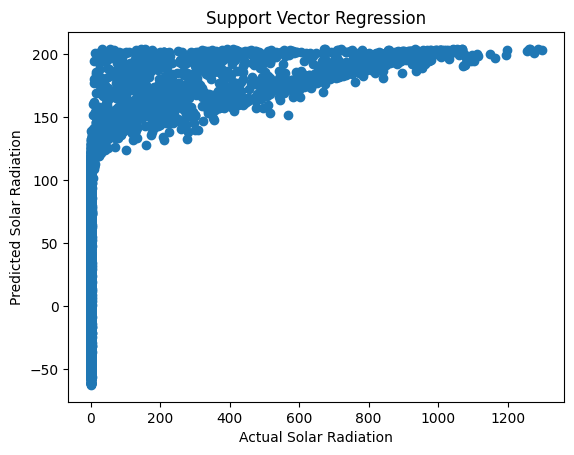

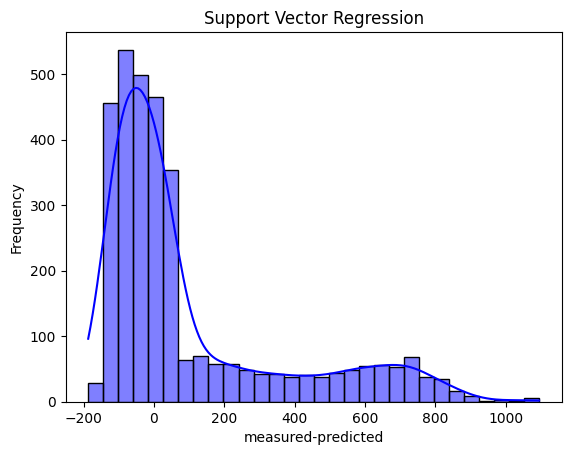

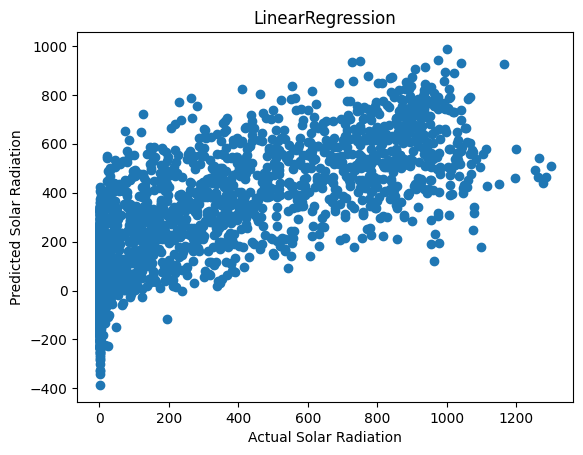

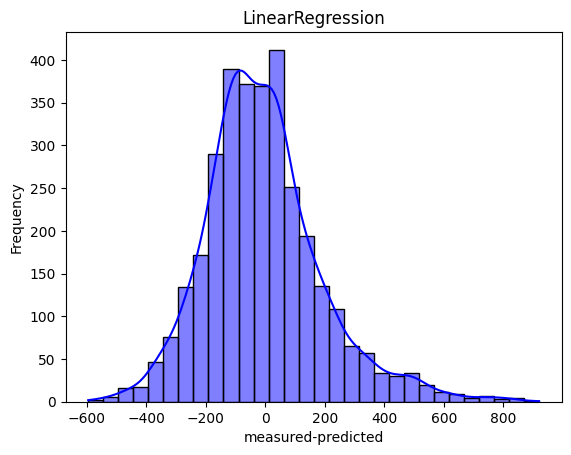

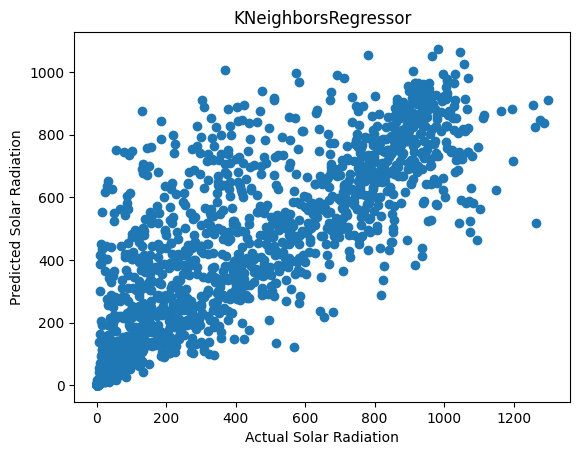

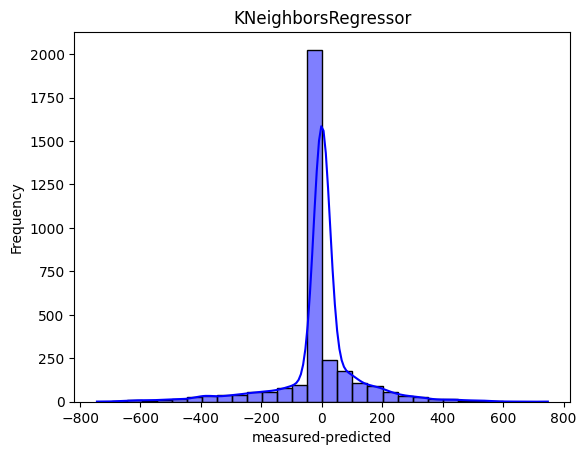

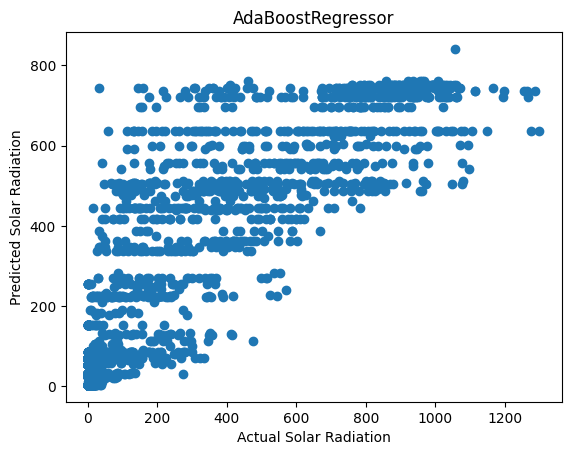

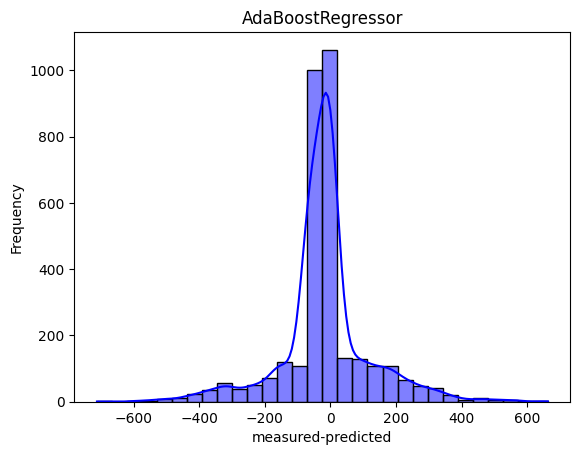

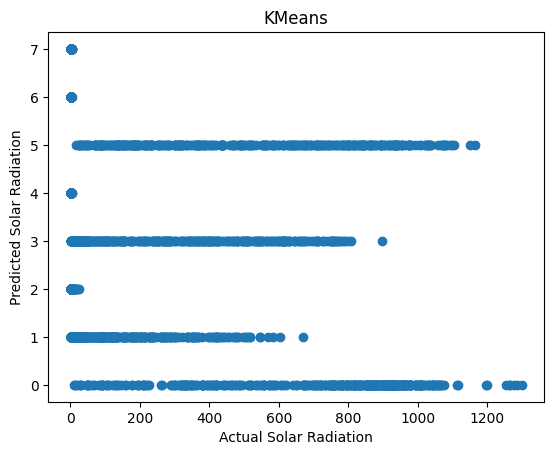

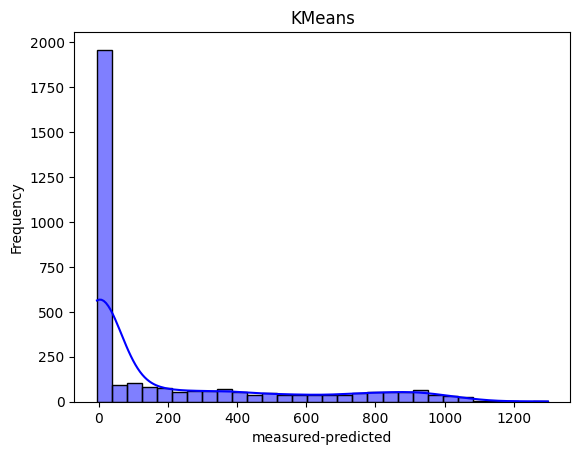

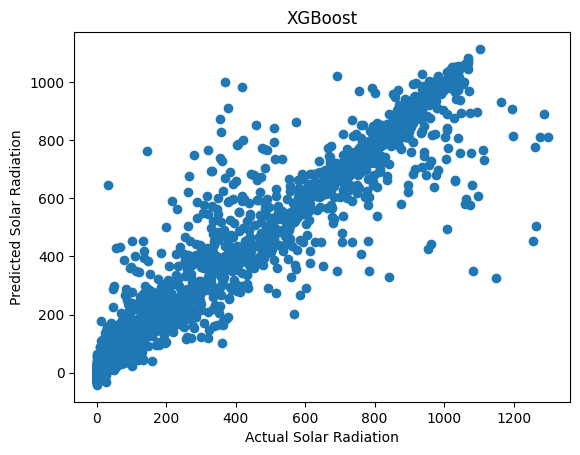

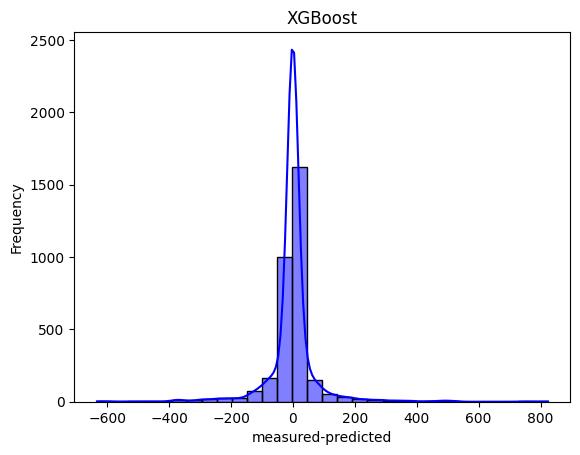

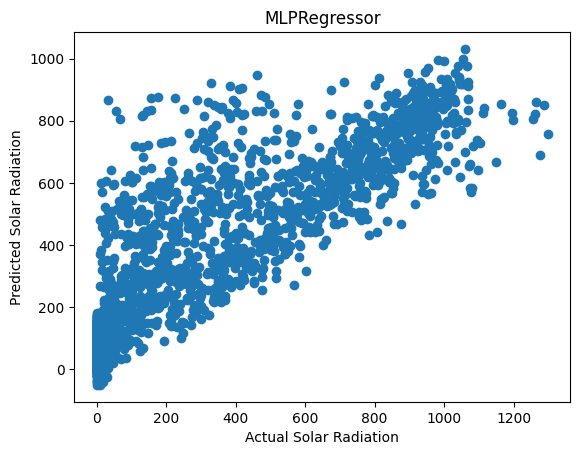

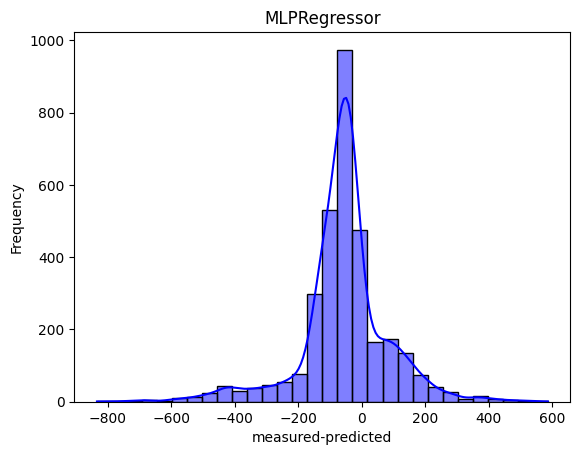

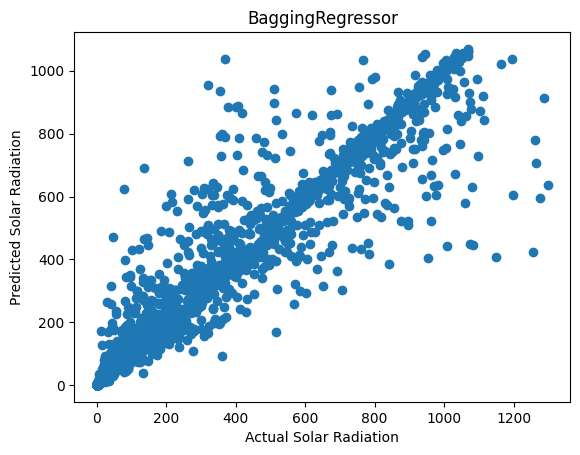

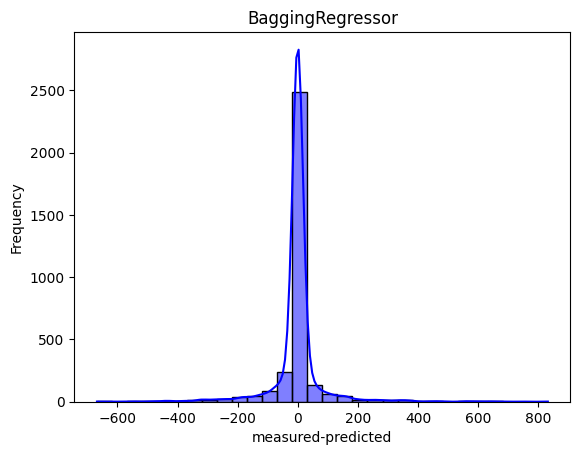

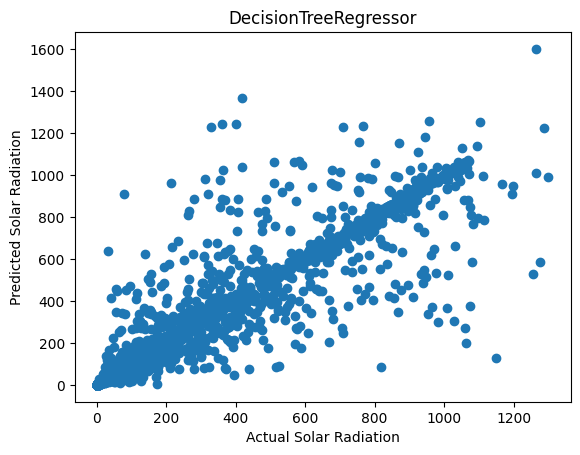

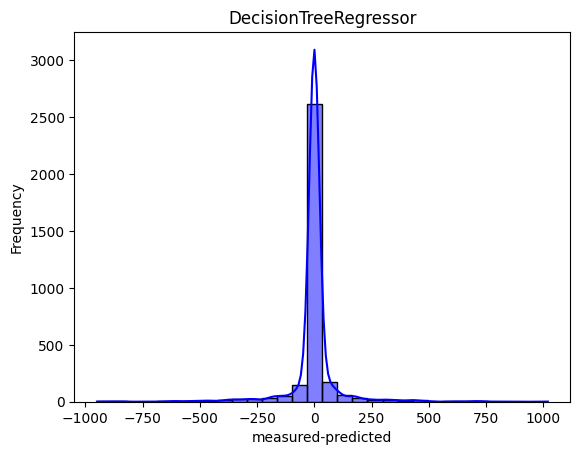

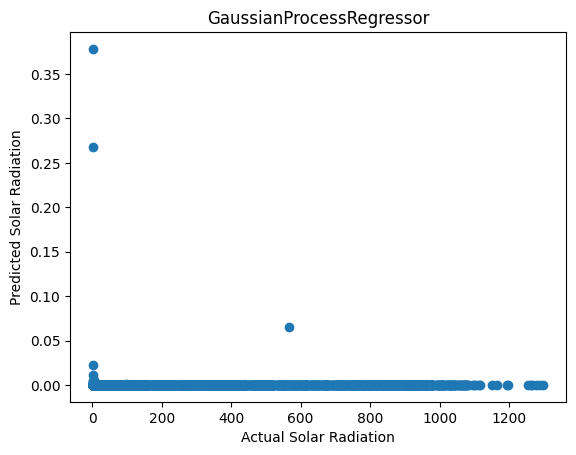

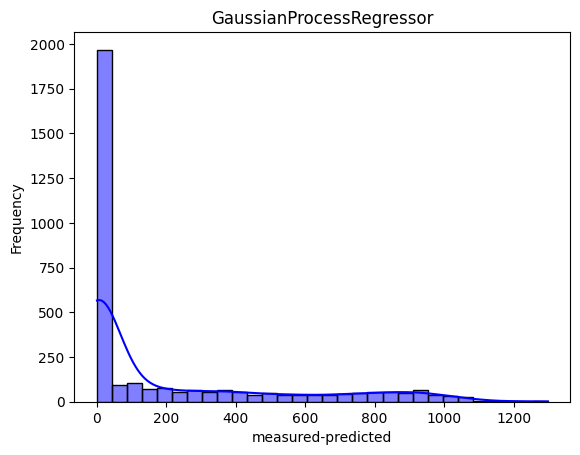

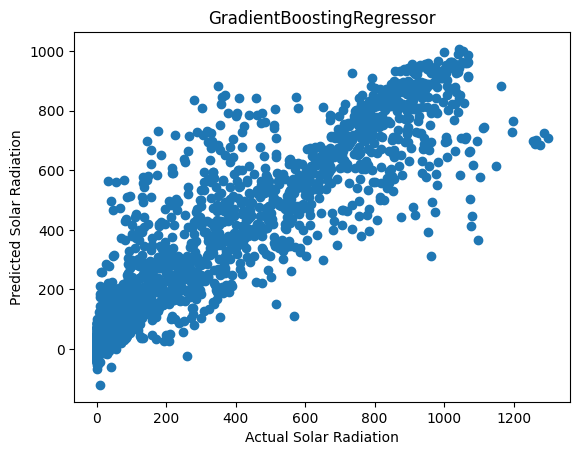

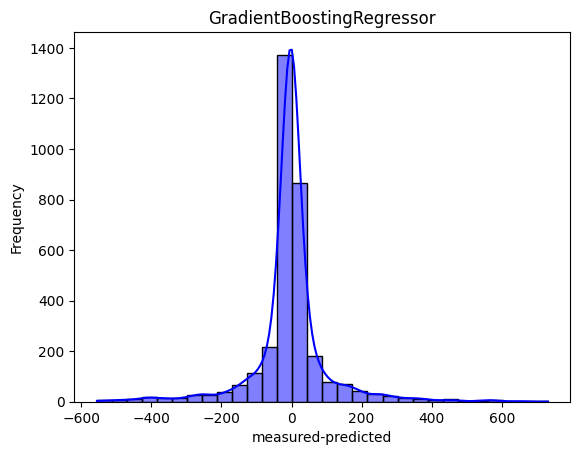

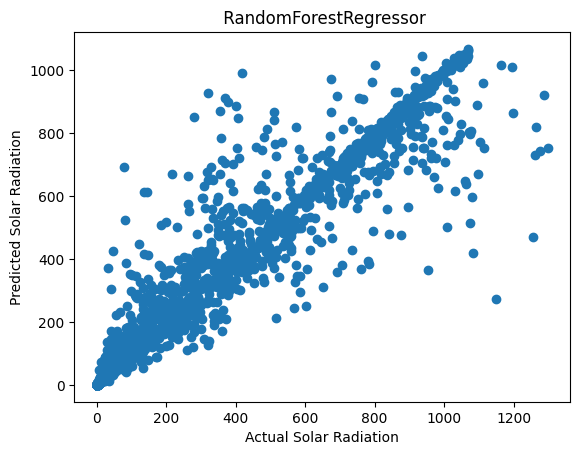

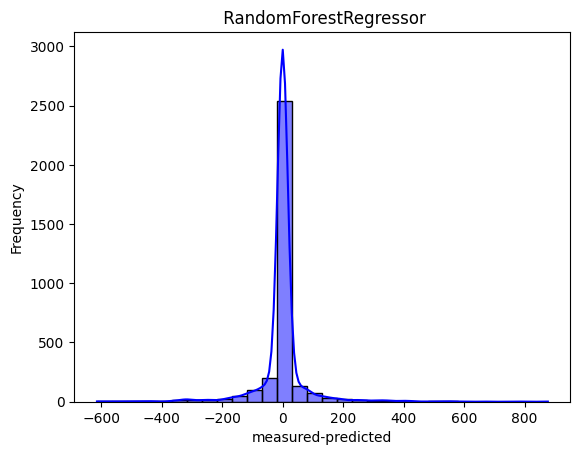

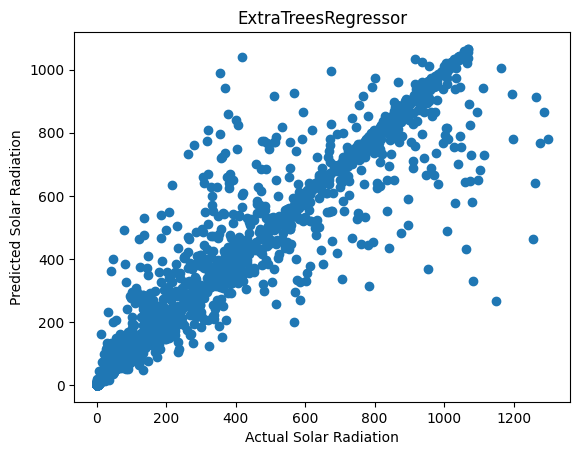

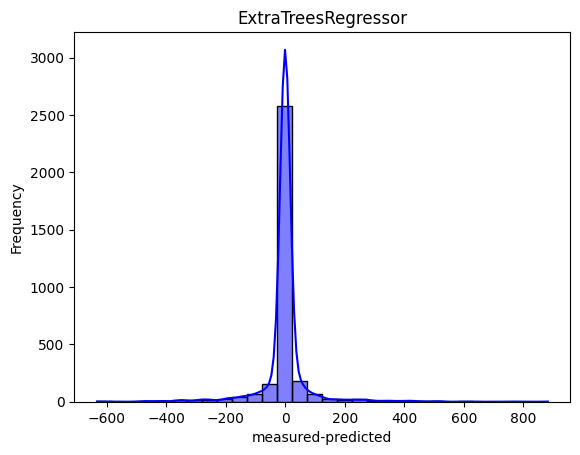

                        Model  \
0   Support Vector Regression   
1            LinearRegression   
2         KNeighborsRegressor   
3           AdaBoostRegressor   
4                      KMeans   
5                     XGBoost   
6                MLPRegressor   
7            BaggingRegressor   
8       DecisionTreeRegressor   
9    GaussianProcessRegressor   
10  GradientBoostingRegressor   
11      RandomForestRegressor   
12        ExtraTreesRegressor   

                                                  var  Mean Squared Error  \
0                                               SVR()        79887.276746   
1                                  LinearRegression()        38767.500261   
2                               KNeighborsRegressor()        18182.827596   
3   (DecisionTreeRegressor(max_depth=3, random_sta...        19236.615811   
4                                            KMeans()       137717.673918   
5   XGBRegressor(base_score=None, booster=None, ca...         7067.199651  

In [49]:
models = {
    
    'Support Vector Regression': SVR(),
     'LinearRegression':LinearRegression(),
    'KNeighborsRegressor':KNeighborsRegressor(),
    'AdaBoostRegressor':AdaBoostRegressor(),
    'KMeans':KMeans(),
    'XGBoost': xgb.XGBRegressor(), 
    'MLPRegressor':MLPRegressor(),
    'BaggingRegressor':BaggingRegressor(),
    'DecisionTreeRegressor':DecisionTreeRegressor(),
    'GaussianProcessRegressor':GaussianProcessRegressor(),
    'GradientBoostingRegressor':GradientBoostingRegressor(),
    ' RandomForestRegressor': RandomForestRegressor(),
    'ExtraTreesRegressor': ExtraTreesRegressor(),
    

}

# Train and evaluate each model
results = []
l=[]
for model_name, model in models.items():

    # Train the model
    x=model
    x.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = x.predict(X_test)
    l.append(x)
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    bias=(y_test-y_pred)
    plt.scatter(y_test,y_pred)
    plt.xlabel("Actual Solar Radiation")
    plt.ylabel("Predicted Solar Radiation")
    plt.title(model_name)
    plt.show()
    sns.histplot(bias, kde=True, color='blue', bins=30)
    plt.title(model_name)
    plt.xlabel('measured-predicted')
    plt.ylabel('Frequency')
    plt.show()
    results.append({
       'Model': model_name,
       'var':x,
        'Mean Squared Error': mse,
         'R2 Value': r2,
         'Mean Absolute Error': mae,
         'Bias':bias,
         
        
    })

# Create a DataFrame
df_results = pd.DataFrame(results)

# Display the DataFrame
print(df_results)


# Display the best model and its MSE
best_model = df_results.loc[df_results['Mean Squared Error'].idxmin()]
print(f"\nThe best model is {best_model['Model']} with Mean Squared Error: {best_model['Mean Squared Error']} and R2 value:{best_model['R2 Value']}")



Mean Squared Error for Stacking Model: 6728.315222316883
R2 Value for Stacking Model: 0.9316060275861984
Mean Absolute Error for Stacking Model: 38.15519223858648
Bias for Stacking Model: 22107     24.496479
3780     494.213420
13651    -19.416929
30473      3.774761
9084     -14.572050
            ...    
25972      7.021227
12994    562.303249
20418      8.227960
10290      7.714567
21849    -13.597850
Name: Radiation, Length: 3269, dtype: float64


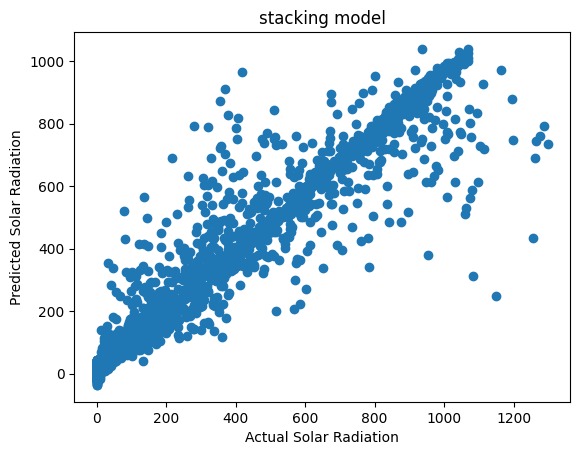

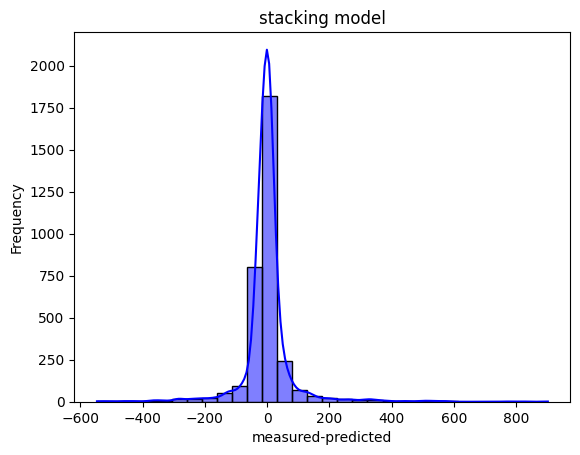

[651.3635213  792.6365796   20.64692944 ...  -6.08796036  -6.50456734
  32.17784973]


In [50]:
# Assuming X_train and X_test are DataFrames
X_train_np = X_train.values
X_test_np = X_test.values

stacking_predictions = stacking_model(X_train_np, y_train, X_test_np,l) 
print(stacking_predictions)


In [51]:
print(df_results['R2 Value'])
print(df_results['Mean Squared Error'])

0     0.187938
1     0.605925
2     0.815170
3     0.804458
4    -0.399913
5     0.928161
6     0.765206
7     0.927056
8     0.884558
9    -0.408409
10    0.876758
11    0.931904
12    0.932289
Name: R2 Value, dtype: float64
0      79887.276746
1      38767.500261
2      18182.827596
3      19236.615811
4     137717.673918
5       7067.199651
6      23098.097806
7       7175.882333
8      11356.686880
9     138553.431400
10     12124.064626
11      6699.038298
12      6661.161319
Name: Mean Squared Error, dtype: float64


In [52]:
results[12]['var']



ExtraTreesRegressor()

In [53]:
import joblib
joblib.dump(results[12]['var'],'mymodel.pkl')
model=joblib.load('mymodel.pkl')
print(model.predict(X_test))


[671.8002 783.9061   1.2281 ...   2.3598   1.2267  21.1311]


c:\Users\karth\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but ExtraTreesRegressor was fitted without feature names
  warnings.warn(


In [23]:
features = [86126.0, 48, 30.46, 70, 177.39, 22380.0, 65580.0]
value = model.predict([features])
print(value)


[1.2134]
